In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df1= pd.read_csv('https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/main/missions/W1/mtcars.csv')
df1.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [4]:
df1.head(5)

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [5]:
df1.tail()

Unnamed: 0   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear  \
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5   
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.6   1   1     4   

    carb  
27     2  
28     4  
29     6  
30     8  
31     2

In [6]:
df1.shape

(32, 12)

In [7]:
df1=df1.rename(columns={'Unnamed: 0':'class'})

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [9]:
df1.dtypes


class     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [10]:
df1.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [11]:
len(df1['gear'].unique()) #gear, transmission features에는 각각 몇가지 값이 있는지를 출력하세요.

3

In [12]:
len(df1['am'].unique())

2

In [165]:
#gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아내세요.
# 방법 1: pandas.crosstab 사용
gear_trans_crosstab = pd.crosstab(df1['gear'], df1['am'])
print("crosstab 사용")
print(gear_trans_crosstab)

# 방법 2: crosstab 사용하지 않는 방법
gear_trans_grouped = df1.groupby(['gear', 'am']).size().reset_index(name='cnt')
print("groupby 사용:")
print(gear_trans_grouped)

crosstab 사용
am     0  1
gear       
3     15  0
4      4  8
5      0  5
groupby 사용:
   gear  am  cnt
0     3   0   15
1     4   0    4
2     4   1    8
3     5   1    5


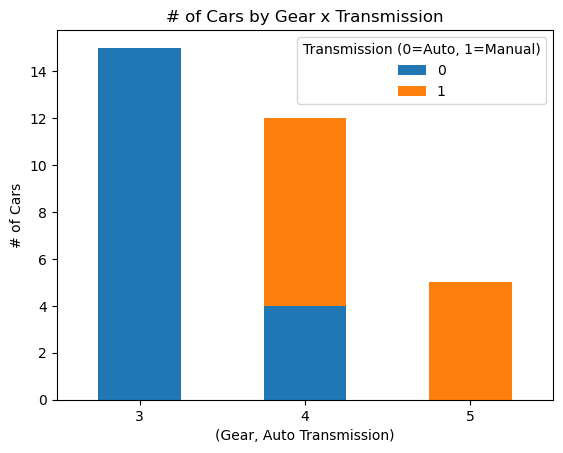

In [14]:
# 바 그래프로 그리기
gear_trans_crosstab.plot(kind='bar', stacked=True)
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.xticks(rotation=0)
plt.legend(title='Transmission (0=Auto, 1=Manual)')
plt.show()

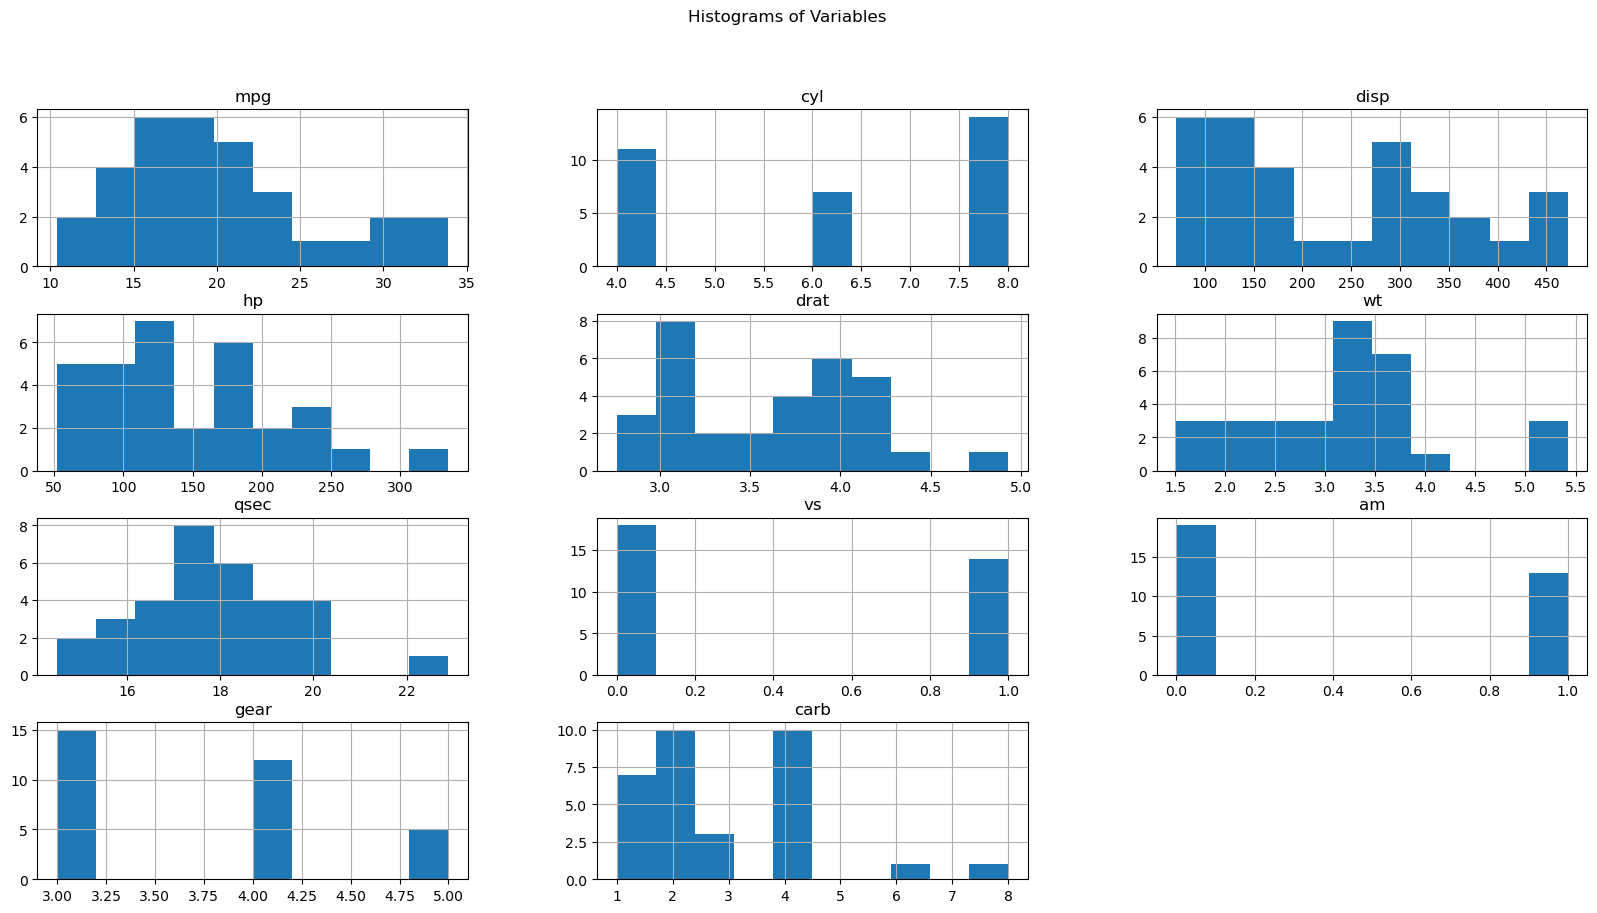

In [15]:

# 데이터셋에 포함된 모든 features의 히스토그램을 그리세요.
df1.hist(figsize=(20, 10), layout=(4, 3))
plt.suptitle('Histograms of Variables')
plt.show()

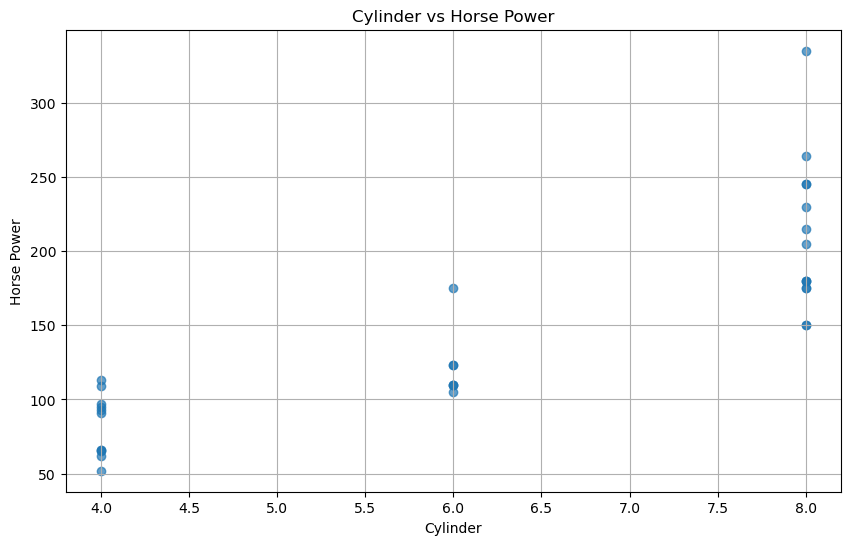

In [16]:
# Cylinder와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리세요.
plt.figure(figsize=(10, 6))
plt.scatter(df1['cyl'], df1['hp'], alpha=0.7)
plt.title('Cylinder vs Horse Power')
plt.xlabel('Cylinder')
plt.ylabel('Horse Power')
plt.grid(True)
plt.show()


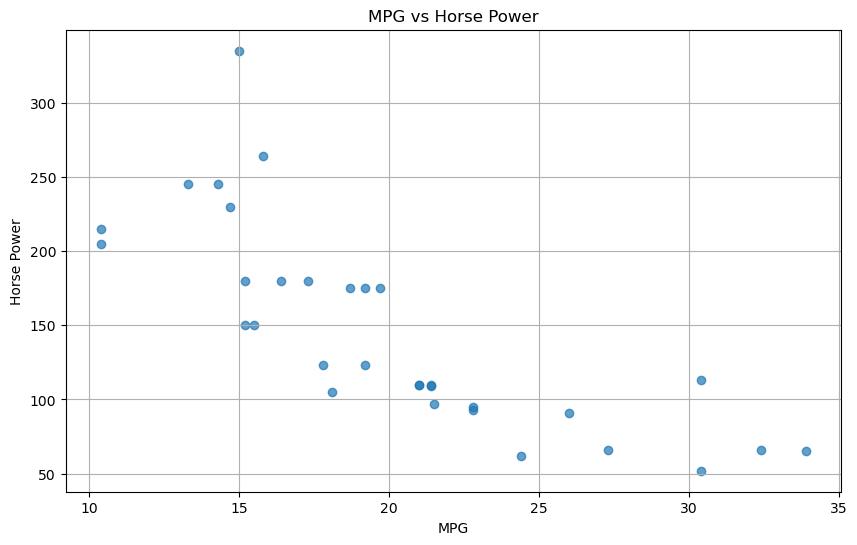

In [17]:
#MPG와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리세요.
plt.figure(figsize=(10, 6))
plt.scatter(df1['mpg'], df1['hp'], alpha=0.7)
plt.title('MPG vs Horse Power')
plt.xlabel('MPG')
plt.ylabel('Horse Power')
plt.grid(True)
plt.show()


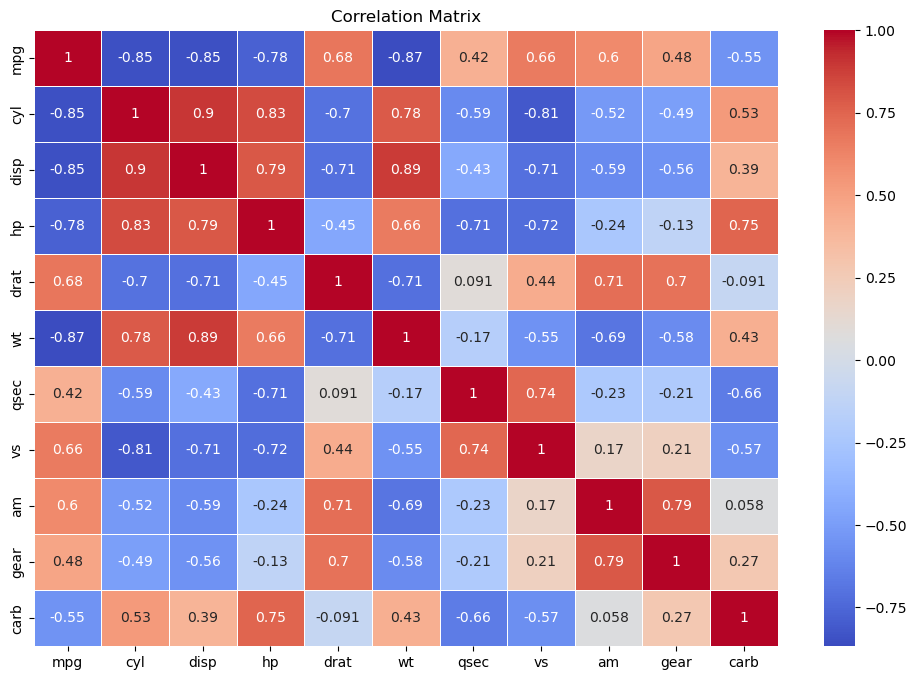

In [18]:

# 각 변수들 간의 상관 관계를 알아 보기 위해 상관계수를 구하는 표를 출력하세요.
numeric_df = df1.select_dtypes(include=[int, float])
corr_matrix = numeric_df.corr()
# 상관 관계 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

    mtcars 데이터셋은 자동차의 성능과 사양에 대한 데이터를 포함하고 있음.
    이를 활용하여 다음과 같은 경제적 가치를 얻을 수 있음.
    1. 제품 개발 및 개선: 제조업체는 성능(예: 마력, 연비)과 자동차 사양(예: 실린더 수, 무게) 간의 상관 관계를 분석하여 새로운 차량 모델 개발에 활용할 수 있다. 높은 연비와 높은 마력을 동시에 달성하는 차량을 개발할 수 있다면, 이는 경제적 가치를 크게 높일 수 있기 때문이다.

### 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

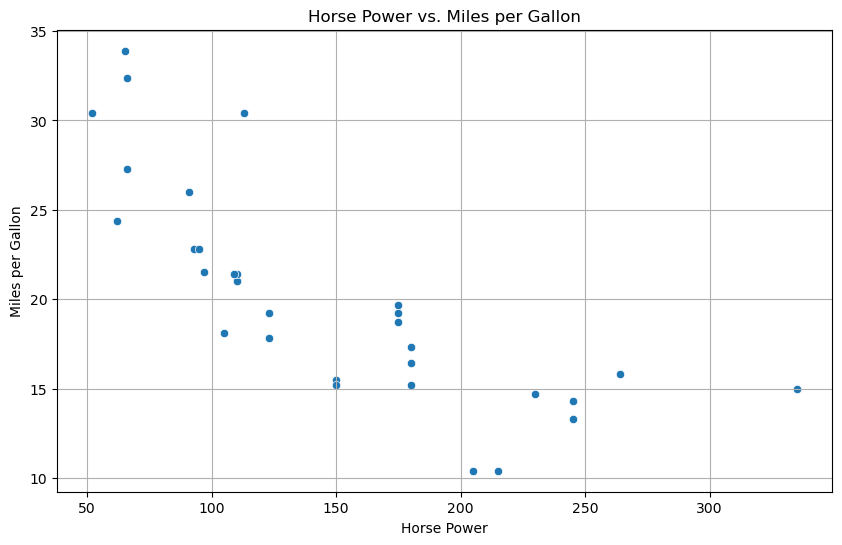

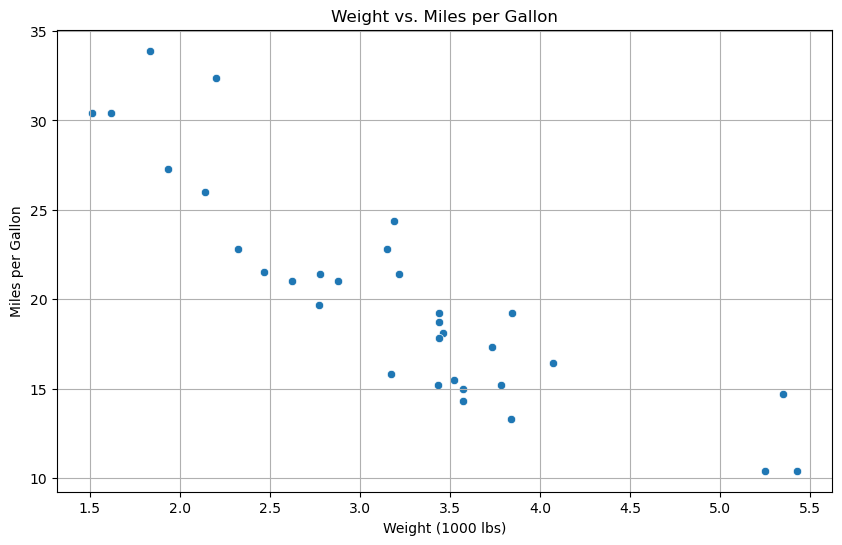

In [19]:

# 마력과 연비의 상관 관계 그래프
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['hp'], y=df1['mpg'])
plt.title('Horse Power vs. Miles per Gallon')
plt.xlabel('Horse Power')
plt.ylabel('Miles per Gallon')
plt.grid(True)
plt.show()

# 차량 무게와 연비의 상관 관계 그래프
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['wt'], y=df1['mpg'])
plt.title('Weight vs. Miles per Gallon')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('Miles per Gallon')
plt.grid(True)
plt.show()

## 1. 마력(hp)와 연비(mpg):
마력이 높은 차량일수록 연비가 낮아지는 경향이 있. 이는 고성능 엔진이 더 많은 연료를 소비하기 때문. 자동차 제조업체는 이 상관 관계를 고려하여 연비와 성능의 균형을 맞춘 차량을 설계할 수 있음. 
## 2. 차량 무게(wt)와 연비(mpg):
차량 무게가 증가할수록 연비가 낮아지는 경향이 보임. 무거운 차량은 더 많은 에너지를 필요로 하여 연비가 낮아짐. 제조업체는 경량화 기술을 통해 연비를 개선할 수 있으며, 이는 소비자에게 경제적 이익을 제공. 또한, 환경 규제에 대응하기 위한 중요한 전략이 될 수 있다.

In [20]:
df1.head()

class   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [23]:
df1.head(3)


class   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0      Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1  Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2     Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   

   carb  
0     4  
1     4  
2     1